# U.S. Medical Insurance Costs

In this project, the file **insurance.csv** is investigated to provide insights about the medical insurance records. There are *1338 records* listed in the file and there are *7 types of information* in each record, which are: **Age, Sex, BMI, Number of children, Smoker condition, Region, and Insurance charge**. Analyses and evaluations to be conducted are:

- Find average age of the patients
- Calculate number of males vs. number of females
- Find lowest, highest and average BMI of all patients, of males and of females
- List kinds of region
- Find average insurance charge for each sex type
- Find average insurance charge for each number of children the patient has
- Find average insurance charge for smoker and non-smoker
- Find average insurance charge for each region
- Find average insurance charge, compare to above types of average insurance charge
- Draw a plot to represent correlation between age and insurance charge
- Draw a plot to represent correlation between BMI and insurance charge
- Make predictions about what features are the most influential for an individual’s medical insurance charges.

### To conduct the analyses and evaluations, first thing is to make lists of different types of information in the records from the csv file. 

Initialize empty lists to store each type of information

In [5]:
ages = []
sexes = []
bmis = []
nums_children = []
smokings = []
regions = []
charges = []

Open the file insurance.csv and readout the data to lists. Because the data is really clean (no missing data, no need to strip) so the split() method is used.

In [7]:
row = []
with open('insurance.csv') as f:
    next(f)
    for line in f:
        row.append(line.split(','))

for item in row:
    ages.append(float(item[0]))
    sexes.append(item[1])
    bmis.append(float(item[2]))
    nums_children.append(int(item[3]))
    smokings.append(item[4])
    regions.append(item[5])
    charges.append(float(item[6]))

### After having lists of different types of record information, next step is building functions to perform each of the tasks listed at the beginning of this project.

#### 1, Find average age of the patients

An average function is defined for further using.

In [11]:
def average(list):
    avg = sum(list)/len(list)
    return round(avg,2)

In [12]:
print("Average age of the patients is:",average(ages))

Average age of the patients is: 39.21


#### 2, Calculate number of males vs. number of females

In [14]:
print("Number of males is:", sexes.count('male'))
print("Number of females is:", sexes.count('female'))

Number of males is: 676
Number of females is: 662


#### 3, Find lowest, highest and average BMI of all patients, of males and of females

Firstly, find the lowest, highest and average BMI of all patients.

In [17]:
print("Lowest BMI recorded:", min(bmis))
print("Highest BMI recorded:", max(bmis))
print("Average BMI:", average(bmis))

Lowest BMI recorded: 15.96
Highest BMI recorded: 53.13
Average BMI: 30.66


Then, to calculate lowest, highest and average BMI of males and of females, new `bmis_male` and `bmis_female` lists are created by finding the indexes of males and females in the `sexes` list and add corresponding BMI values in `bmis` to the lists. Here the `sexes` list only contains 'male' and 'female' items.

In [19]:
bmis_male = []
bmis_female = []
for i in range(len(sexes)):
    if sexes[i]=='male': 
        bmis_male.append(bmis[i])
    else:
        bmis_female.append(bmis[i])

print("Lowest male BMI recorded:", min(bmis_male))
print("Lowest female BMI recorded:", min(bmis_female))
print("Highest male BMI recorded:", max(bmis_male))
print("Highest female BMI recorded:", max(bmis_female))
print("Average male BMI:", average(bmis_male))
print("Average female BMI:", average(bmis_female))

Lowest male BMI recorded: 15.96
Lowest female BMI recorded: 16.815
Highest male BMI recorded: 53.13
Highest female BMI recorded: 48.07
Average male BMI: 30.94
Average female BMI: 30.38


#### 4, List kinds of region
Iterate through list `regions` to find all the regions that patients live in.

In [21]:
region_list = []
for region in regions:
    if region in region_list: 
        continue
    else:
        region_list.append(region)

print("List of regions:\n",region_list)

List of regions:
 ['southwest', 'southeast', 'northwest', 'northeast']


#### 5, Find average insurance charge for each sex type
Similar to item *3,* above, we will create particular insurance charge lists for each category and then calculate average values.

In [23]:
insurance_male = []
insurance_female = []

for i in range(len(sexes)):
    if sexes[i]=='male':
        insurance_male.append(charges[i])
    else:
        insurance_female.append(charges[i])

print("Average insurance charge for male:",average(insurance_male))
print("Average insurance charge for female:",average(insurance_female))

Average insurance charge for male: 13956.75
Average insurance charge for female: 12569.58


#### 6, Find average insurance charge for each number of children the patient has
Firstly, find types of number of children. Secondly, create insurance charge lists for each type of number of children. Finally, calculate average insurance charge of each type.

In [25]:
num_child_list = []
for num in nums_children:
    if num in num_child_list: 
        continue
    else:
        num_child_list.append(num)

print(num_child_list)

[0, 1, 3, 2, 5, 4]


There are 6 types of number of children that patient has. So we will creat corresponding 6 insurance charge lists. To do this fast we will use the function `create_charges_list_item` to create a sublist of `charges` based on index of the item that has particular value in other list.

In [27]:
def create_charges_list_item(list,charges_list,item):
    new_list = []
    for i in range(len(list)):
        if list[i]==item:
            new_list.append(charges_list[i])
    return new_list

for num in num_child_list:
    charges_child = create_charges_list_item(nums_children,charges,num)
    print(f"Average insurance charge for patient who has {num} children:", average(charges_child))

Average insurance charge for patient who has 0 children: 12365.98
Average insurance charge for patient who has 1 children: 12731.17
Average insurance charge for patient who has 3 children: 15355.32
Average insurance charge for patient who has 2 children: 15073.56
Average insurance charge for patient who has 5 children: 8786.04
Average insurance charge for patient who has 4 children: 13850.66


#### 7, Find average insurance charge for smoker and non-smoker
The method is the same as above. Here the items in `smokings` is either 'yes' or 'no'. So we use the function `create_charges_list_item` to creat two sublists of `charges` for smoker and non-smoker. Then, the average charge for each type is calculated.

In [29]:
charges_smoker = create_charges_list_item(smokings,charges,'yes')
charges_non_smoker = create_charges_list_item(smokings,charges,'no')

print("Average insurance charge for patient who is smoker:",average(charges_smoker))
print("Average insurance charge for patient who is non-smoker:",average(charges_non_smoker))

Average insurance charge for patient who is smoker: 32050.23
Average insurance charge for patient who is non-smoker: 8434.27


#### 8, Find average insurance charge for each region
The method is the same as above. Here we had 4 kinds of region in `region_list`, so 4 sublists of `charges` will be created for patients in each region. Then, the average charge for each region is calculated.

In [31]:
for region in region_list:
    charges_region = create_charges_list_item(regions,charges,region)
    print(f"Average insurance for patient who lives in {region}:", average(charges_region))

Average insurance for patient who lives in southwest: 12346.94
Average insurance for patient who lives in southeast: 14735.41
Average insurance for patient who lives in northwest: 12417.58
Average insurance for patient who lives in northeast: 13406.38


#### 9, Find average insurance charge, compare to above types of average insurance charge

In [33]:
print("Average insurance charge:", average(charges))

Average insurance charge: 13270.42


#### From the above calculations, for relation between the categorical variables and insurance charge, we can see that smokers likely to pay much more insurance than non-smokers (average: 32050.23 vs. 8434.27). Other categorical variables (sex, number of children, region) does not affect insurance remarkably.

#### 10, Draw a plot to represent correlation between age and insurance charge

Correlation coefficient: 0.29900819333064765


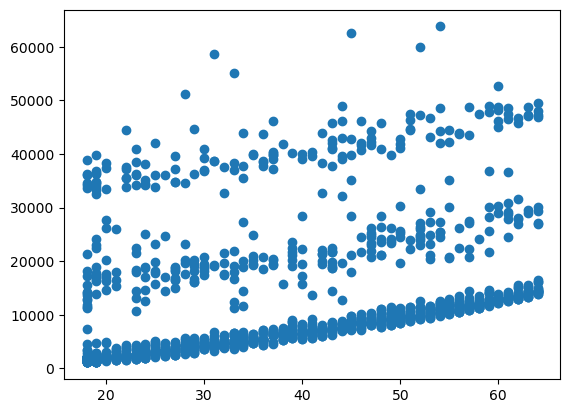

In [36]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(ages)
ypoints = np.array(charges)
print("Correlation coefficient:",np.corrcoef(xpoints, ypoints)[0, 1])

plt.plot(xpoints, ypoints, 'o')
plt.show()

From the above plot, and knowing that the correlation coefficient is 0.3, we can conclude that higher age is slightly correlated with higher insurance charge.

#### 11, Draw a plot to represent correlation between BMI and insurance charge

Correlation coefficient: 0.1983409688336289


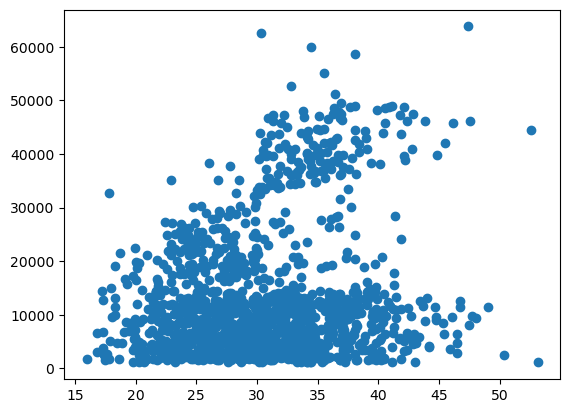

In [39]:
xpoints = np.array(bmis)
ypoints = np.array(charges)
print("Correlation coefficient:",np.corrcoef(xpoints, ypoints)[0, 1])

plt.plot(xpoints, ypoints, 'o')
plt.show()

From the above plot, and knowing that the correlation coefficient is 0.2, we can conclude that higher BMI is slightly correlated with higher insurance charge.

#### 12, Make predictions about what features are the most influential for an individual’s medical insurance charges: 
Smoking would be the most influential for an individual's medical insurance charge.